excercise 1

a) Import the dataset (csv file) using pandas into a dataframe named df

In [ ]:
!pip install factor_analyzer==0.3.2

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
import pandas as pd


In [ ]:
url = 'https://raw.githubusercontent.com/MaastrichtU-IDS/global-studies/main/semester4/tutorial6/data_assignment_2/tolerance_survey_assignment.csv'
df = pd.read_csv(url) # 
df.head(20) #show first 10 values

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
0,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat disagree,Somewhat agree,Disagree,Disagree,Somewhat disagree,Somewhat disagree,Strongly Agree,Somewhat disagree
1,Strongly Disagree,Strongly Disagree,Strongly Agree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat disagree,Agree,Agree,Somewhat agree,Disagree,Somewhat agree
2,Disagree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Somewhat agree,Agree,Somewhat agree,Disagree,Somewhat disagree,Somewhat agree,Disagree,Agree
3,Agree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree,Disagree,Agree,Disagree,Somewhat agree,Strongly Disagree,Somewhat disagree,Somewhat disagree,Somewhat agree
4,Disagree,Disagree,Agree,Somewhat agree,Agree,Disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat agree
5,Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Somewhat disagree,Agree,Disagree,Disagree,Somewhat disagree,Somewhat agree,Somewhat disagree,Agree
6,Somewhat agree,Somewhat disagree,Somewhat agree,Agree,Agree,Strongly Disagree,Disagree,Disagree,Strongly Disagree,Strongly Disagree,Agree,Disagree,Agree
7,Somewhat disagree,Strongly Agree,Somewhat agree,Disagree,Strongly Disagree,Strongly Agree,Somewhat disagree,Disagree,Strongly Agree,Somewhat agree,Somewhat disagree,Disagree,Somewhat agree
8,Agree,Somewhat disagree,NaN,Somewhat agree,Somewhat disagree,Agree,Agree,Disagree,Somewhat disagree,Somewhat disagree,Strongly Agree,Strongly Agree,Strongly Agree
9,Disagree,Disagree,Somewhat agree,Agree,Agree,Agree,Agree,Agree,Disagree,Somewhat agree,Agree,Strongly Disagree,Agree


b) Transform the DataFrame df from Likert scale to numbers

In [ ]:
df_transformed = df.replace(['Strongly Agree',
                   'Agree', 
                   'Somewhat agree', 
                   'Somewhat disagree', 
                   'Disagree',
                   'Strongly Disagree'], [6,5,4,3,2,1])

I transform the scale into numbers so it is more simple to process the data. By doing the function df_transformed, I tell it to change it from the words to the numbers.

In [ ]:
df_transformed.

36400

c) Handle the missing values: Compute the median of each survey item/question and replace the missing values by the median of that particular item

In [ ]:
column_median = df_transformed.median()
column_median   

q1     3.0
q2     3.0
q3     4.0
q4     5.0
q5     5.0
q6     3.0
q7     4.0
q8     3.0
q9     3.0
q10    3.0
q11    5.0
q12    2.0
q13    5.0
dtype: float64

why is it easier to look at the mean? 

In [ ]:
df_transformed = df_transformed.fillna(column_median) #we are filling empty(null value ) with median

By doing this, I have transform the dataframe ans replace the missing values with the median values.

> Indented block



In [ ]:
df_transformed.q1.values

array([3., 1., 2., ..., 2., 2., 3.])

Q2. Conduct a Reliability analysis for the Tolerance Questionnaire

a) Compute the Cronbach's Alpha for the entire dataframe df_transformed

In [ ]:
!pip install pingouin 

In [ ]:
import pingouin as pg 

In [ ]:
pg.cronbach_alpha(data = df_transformed) 

(0.49444734360160075, array([0.466, 0.522]))

The Cronbach's Alpha varies from 0 to 1. If the values are lower, then there is a lower consistency, and if the values are higher, therefore closer to 1, there is a higher cosistency. Looking at the results that we got, we can see that the values are quite low. This means that there is a low consistency, also meaning that there is a lower correlation between them. The alpha is lower than 0.70, and as stated in the documents provided, an alpha lower than this number indicates no reliability . There is therefore a poor internal consistency, meanig that the questions and the itmes are poorly correlated. This can also imply that the construction of the scale was poorly made, as there is poor internal consistency. 
 


b) Extract the survey items q3, q4, q5 into a dataframe named df_A. Extract the survey items q11, q12, q13 into a dataframe named df_B.

In [ ]:
df_A = df_transformed[['q3','q4','q5']]

In [ ]:
df_A

,q3,q4,q5
0,3.0,4.0,4.0
1,6.0,4.0,3.0
2,4.0,4.0,5.0
3,4.0,4.0,4.0
4,5.0,4.0,5.0
...,...,...,...
2795,5.0,5.0,6.0
2796,4.0,4.0,3.0
2797,6.0,3.0,6.0
2798,4.0,5.0,4.0


In [ ]:
df_B = df_transformed[['q11','q12','q13']]

In [ ]:
df_B

,q11,q12,q13
0,3.0,6,3.0
1,4.0,2,4.0
2,4.0,2,5.0
3,3.0,3,4.0
4,3.0,3,4.0
...,...,...,...
2795,6.0,1,6.0
2796,6.0,3,5.0
2797,5.0,1,6.0
2798,5.0,2,5.0


By doing the function df_b = df_transformed, and the same with df_a, I was able to put the three different items (q3,4,5 and q11,12,13) together in two different dataframes. 

c) Compute the Cronbach's Alpha values for dataframes df_A and df_B. Interpret the results of the Cronbach's alpha for measuring the internal consistency of df_A and df_B.

In [ ]:
pg.cronbach_alpha(data = df_A)  #pg is librarry #cronbach_alpha is function inside bracket we gave dataset

(0.6370880533038319, array([0.613, 0.66 ]))

In [ ]:
pg.cronbach_alpha(data = df_B)

(-0.22037012511691834, array([-0.301, -0.144]))

Looking at the resulting alpa for the dataset df_A, the alpha has a value of 0.6, which means that there is a questionable internal consitency. This is because the value is relatively low. This also implies that the dataset is not very reliable and there is very low correlation between items. 
As to the second result, normally Cronbach alphas should be within 0 and 1. If a number is negative, then it implies that there is an error in the coding and it should be recoded. If it would be interpeted as a 0, then it would signify an unacceptable internal consitency, meanig that the scale and instrument is not reliable at all. 

d) Write the overall interpretation of the reliability analysis after taking into account the Cronbach'a alpha value from a) and c) above (125 words max)

By comparing the resuls of the Conbach's alpha in both the general dataset and the two more detailed one, one can see that overall, the Alpha is realitvely low, with the one from the dataset Df_transformed being 0.4, the one from df_A being 0.6 and finally the last one being non conclusive. This overall means that the dataset that we have been presented with has a significantly low interanl consintency, making therefore the scale and instrument to measure not reliable or consitent enough. Another thing to point is as the alpha is low, the items and the questions are not correlated, or their correlation is vey weak. This also means that our scale is not that valid, as an instrument cannot be valid if it is not reliable. The dataset is realatively weak, the highest value of alpha being the one for the three specifc items q3,4,5. This could also imply that the three items might be more correlated between each other, as the alpha is higher than the other two. 

Q3. Conduct a Validity analysis for the Tolerance Questionnaire

a) Compute the Correlation matrix between the survey items.

In [ ]:
df_transformed.corr().style.background_gradient(cmap="Reds")

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
q1,1.000000,0.464187,-0.323455,-0.415421,-0.300595,0.017004,0.014359,0.050349,0.227826,0.050508,-0.099461,0.044484,-0.216708
q2,0.464187,1.000000,-0.377449,-0.511964,-0.370553,0.165439,0.192556,0.195856,0.342687,0.252951,-0.158280,0.081041,-0.226743
q3,-0.323455,-0.377449,1.000000,0.415784,0.380626,-0.050163,-0.066120,-0.020303,-0.144305,-0.073802,0.324284,-0.066518,0.389446
q4,-0.415421,-0.511964,0.415784,1.000000,0.313978,-0.134500,-0.139219,-0.099616,-0.286052,-0.091058,0.135208,0.057665,0.204996
q5,-0.300595,-0.370553,0.380626,0.313978,1.000000,0.037384,0.036992,-0.061609,-0.211010,-0.133997,0.295632,-0.082710,0.290557
q6,0.017004,0.165439,-0.050163,-0.134500,0.037384,1.000000,0.702443,0.553255,0.395122,0.375345,-0.050112,0.129615,-0.050609
q7,0.014359,0.192556,-0.066120,-0.139219,0.036992,0.702443,1.000000,0.545981,0.387190,0.347364,-0.047114,0.126632,-0.033171
q8,0.050349,0.195856,-0.020303,-0.099616,-0.061609,0.553255,0.545981,1.000000,0.515218,0.425788,-0.034092,0.106901,-0.027938
q9,0.227826,0.342687,-0.144305,-0.286052,-0.211010,0.395122,0.387190,0.515218,1.000000,0.393673,-0.048324,0.082268,-0.062676
q10,0.050508,0.252951,-0.073802,-0.091058,-0.133997,0.375345,0.347364,0.425788,0.393673,1.000000,-0.115222,0.197457,-0.072928


As also hypothesised in the previous exercise and also shown by the highest Cronbach's alpha out of the three datasets, q3,q4 and q5 seems to be closely correlated.Two other items that seem to be also closely correlated are q6, q7 and q8

b) Plot a heatmap for the Correlation matrix using the seaborn library

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

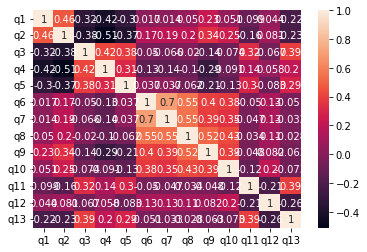

In [ ]:
sns.heatmap(df_transformed.corr(),annot=True)

The heatmap also shows the clusters of variables that are closely correlated, as mentioned before, q3,4,5. 

c) Interpret the results from the correlation matrix and the heatmap. Which survey items can be grouped together ? How many clusters (group of highly correlated survey items) do you observe ? (Use Markdown cell to answer).

As mentioned previously, by looking at the Cronbachs' alpha, I made the hypothesis that the items q3,4,5 would be closely correlated. The correlation matrix as well as the heatmap confirm this. As seen on both, where the three items are, the colours are darker, implying that t=it is closer to 1, showing a closer correlation. Another cluster I saw was the one of q6,7,8, hich also had numbers that came close to 1 and had daker colours. These would be the two clusters i would male, as they are the most prominent ones. 

Q4. Conduct an Exploratory Factor analysis for the Tolerance Questionnaire

a) Conduct an Exploratory Factor Analysis on df_transformed. Set the number of factors n_factors equal to the number of items in the survey and choose method = 'principal' for principal factor extraction method of exploratory factor analysis

In [ ]:
no_of_items = df_transformed.shape[1] 
no_of_items

13

this number shows the number of questions in our survey

In [ ]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=no_of_items, method='principal') 
fa.fit(df_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


FactorAnalyzer(method='principal', n_factors=13, rotation_kwargs={})

b) Print the eigen values and make the scree plot.

In [ ]:
ev, v = fa.get_eigenvalues()
ev

array([3.57438104, 2.37548199, 1.39390696, 0.88689717, 0.81222878,
       0.62111575, 0.58360117, 0.57768912, 0.52809613, 0.5123727 ,
       0.43921023, 0.40154669, 0.29347228])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_axis = range(1, no_of_items+1)
y_axis = ev

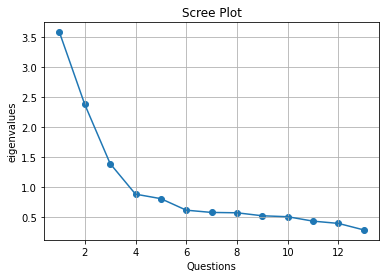

In [ ]:
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, y_axis)
plt.title('Scree Plot')
plt.xlabel('Questions')
plt.ylabel('eigenvalues')
plt.grid()
plt.show()

c) How many factors will you choose depending on the eigen values and the interpretation of the scree plot ? Explain the reason of your choice

Looking at the scree plot and at the eigen value, I would choose the first three values as eigen values, as they have the eigen value above 1. These three values are: 3.57, 2.37, 1.39. In the scree plot above, the first three values are above 1, hence why they are the eigen values. 

d) What are the coordinates (x,y) of the point of inflexion ?

the coordinates are (6, 0.6)

Q5. Interpreting the results of Exploratory Factor Analysis

a) Fit the factor analysis model on the retained factors. Set n_factors as the number of retained factors. Set method = 'principal' and rotation = 'varimax'

In [ ]:
no_of_retained_factors = 3
fa = FactorAnalyzer(n_factors = no_of_retained_factors , method='principal', rotation ='varimax')
fa.fit(df_transformed) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

I put the number three as the eigenvalues are 3

b) Print the factor loading matrix. Create a pandas dataframe, df_loadings from the factor loading matrix. The index of the factor loadings dataframe represent the survey items/questions. The columns of the dataframe represent the factor names. If you have retained m factors then the names of the columns of the DataFrame should be: Factor 0, Factor 1, ........ Factor m-1. For example, if m=3 then your column names are: Factor 0, Factor 1 and Factor 2.

In [ ]:
fa.loadings_

array([[ 8.16792823e-03, -7.19411927e-01, -6.09977195e-03],
       [ 2.48456302e-01, -7.40264990e-01, -7.17594756e-02],
       [ 1.71980011e-02,  6.15277028e-01,  3.84632092e-01],
       [-1.25112991e-01,  7.75132254e-01, -4.53642102e-02],
       [ 2.64961334e-02,  5.80311998e-01,  3.42197345e-01],
       [ 8.24240513e-01,  1.22543957e-02, -4.08584227e-02],
       [ 8.14162953e-01, -3.31317773e-03, -2.63779046e-02],
       [ 8.06757699e-01, -4.97824063e-02,  6.85677839e-04],
       [ 6.49112908e-01, -3.62784226e-01,  5.32671002e-02],
       [ 6.28269761e-01, -7.34003052e-02, -1.88225020e-01],
       [-6.32644629e-03,  1.66551315e-01,  7.28423928e-01],
       [ 2.04599072e-01,  1.53528554e-01, -6.48728262e-01],
       [ 1.85055947e-02,  2.89722833e-01,  7.02108669e-01]])

In [ ]:
df_loadings = fa.loadings_

In [ ]:
df_loadings = pd.DataFrame(fa.loadings_, index = df_transformed.columns , columns = ['Factor 0', 'Factor 1', 'Factor 2'] )

In [ ]:
df_loadings 

,Factor 0,Factor 1,Factor 2
q1,0.008168,-0.719412,-0.006100
q2,0.248456,-0.740265,-0.071759
q3,0.017198,0.615277,0.384632
q4,-0.125113,0.775132,-0.045364
q5,0.026496,0.580312,0.342197
q6,0.824241,0.012254,-0.040858
q7,0.814163,-0.003313,-0.026378
q8,0.806758,-0.049782,0.000686
q9,0.649113,-0.362784,0.053267
q10,0.628270,-0.073400,-0.188225


In [ ]:
df_loadings.style.background_gradient(cmap = "Blues")

,Factor 0,Factor 1,Factor 2
q1,0.008168,-0.719412,-0.006100
q2,0.248456,-0.740265,-0.071759
q3,0.017198,0.615277,0.384632
q4,-0.125113,0.775132,-0.045364
q5,0.026496,0.580312,0.342197
q6,0.824241,0.012254,-0.040858
q7,0.814163,-0.003313,-0.026378
q8,0.806758,-0.049782,0.000686
q9,0.649113,-0.362784,0.053267
q10,0.628270,-0.073400,-0.188225


c) Mention the most representative survey items/questions for each Factor. Consider a threshold of above +0.55 and below -0.55 for choosing the factor loadings

As the number 0.55 is the representative one, once a threshold is above 0.55 or below then the factor is repesentative for that question. For instance, factor 0 is representative of q6,7,8, as they are all above 0.55. Factor 1 is representative of q3,4,5. For factor 2, it is repesentative of q1,2 as they are below -0.55. 

d) Compute the unique variance for each survey item (assume that the total variance is 1). Store or print the results in an array or dataframe.

by doing this i have represented the survey data in terms of factors.

In [ ]:
fa.get_uniquenesses()

array([0.48234256, 0.38512779, 0.47319656, 0.38145882, 0.54543692,
       0.318808  , 0.33643192, 0.34666326, 0.44420265, 0.56446084,
       0.44161922, 0.51371985, 0.42276164])

In [ ]:
df_uniquevariance = pd.DataFrame(fa.get_uniquenesses(), index = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8','q9','q10','q11','q12','q13'])
df_uniquevariance

,0
q1,0.482343
q2,0.385128
q3,0.473197
q4,0.381459
q5,0.545437
q6,0.318808
q7,0.336432
q8,0.346663
q9,0.444203
q10,0.564461


In [ ]:

df_variance = pd.DataFrame(fa.get_factor_variance(), index = ['Variance', 'Proportional variance', 'Cumulative variance'] , columns =[ 'Factor 0', 'Factor 1','Factor 2'] )
df_variance

,Factor 0,Factor 1,Factor 2
Variance,2.929854,2.656593,1.757323
Proportional variance,0.225373,0.204353,0.135179
Cumulative variance,0.225373,0.429727,0.564905


e) Compute the amount of variance in percentage explained by the number of retained factors.

In [ ]:
print(df_variance.loc['Cumulative variance']*100)

Factor 0    22.537337
Factor 1    42.972665
Factor 2    56.490538
Name: Cumulative variance, dtype: float64


As the word might suggest, cumulative variance are the variances added up. Therefore the variance that is shown behind factor two represents represents all variances combined, meaning that the amount of variance in precentage explained by the number of retained factors is of 56.4%